In [1]:
import pandas as pd
df = pd.read_csv("gossip_SMOTE.csv")
subdf = df[['class','sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]

test = pd.read_csv("gossip_SMOTE_test.csv")
test = test[['class','sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]


In [2]:
#subdf.tail(10)
test.tail(10)

,class,sp_count,up_count,title_cha,title_word,cha_word,up_cha,up_word,bad_word
6632,0,1,10,42,9,4.7,23,111,0
6633,0,2,8,65,11,5.9,12,72,0
6634,0,2,16,80,14,5.7,20,114,0
6635,0,2,10,53,10,5.3,18,100,0
6636,0,0,4,81,15,5.4,4,26,0
6637,0,0,5,36,8,4.5,13,62,0
6638,0,2,4,50,8,6.2,8,50,0
6639,0,0,11,48,11,4.4,22,100,0
6640,1,4,15,70,15,4.7,21,100,0
6641,0,0,4,56,12,4.7,7,33,0


In [3]:
# logistic regression

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
x= subdf[['sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]
y= subdf[['class']]

In [5]:
######################## regression with ALL features #################################
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x_train = x
x_test = test[['sp_count','up_count','title_cha','title_word','cha_word','up_cha','up_word','bad_word']]
y_train = y
y_test = test[['class']]
columns = x_train.columns

# logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression classifier on test set: 0.55


In [6]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2792 2246]
 [ 746  858]]


In [7]:
# MCC
m = confusion_matrix
TP = m[1][1];
TN = m[0][0];
FN = m[1][0];
FP = m[0][1];
MCC = (TP*TN-FP*FN)/(np.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)));
print('MCC =', MCC)

MCC = 0.0764317011543552


In [23]:
# there are many false positive, so increase the threshold

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

THRESHOLD = 0.6
preds = np.where(logreg.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
confm = confusion_matrix(y_test, preds)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])


,0
accuracy,0.757302
recall,0.019950
precision,0.444444
roc_auc_score,0.506005


In [24]:
confm

array([[4998,   40],
       [1572,   32]])

In [25]:
THRESHOLD = 0.7
preds = np.where(logreg.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
confm = confusion_matrix(y_test, preds)
confm

array([[5032,    6],
       [1602,    2]])

In [8]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.689274
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.006     
Dependent Variable: class            AIC:              32491.8270
Date:               2019-08-28 20:02 BIC:              32556.3647
No. Observations:   23558            Log-Likelihood:   -16238.   
Df Model:           7                LL-Null:          -16329.   
Df Residuals:       23550            LLR p-value:      5.7876e-36
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
sp_count      -0.0201    0.0094  -2.1285  0.0333  -0.0386  -0.0016
up_count       0.0063    0.0087   0.7249  0.4685  -0.0108   0.

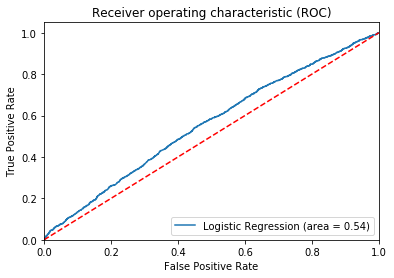

In [9]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [10]:
x_test

,sp_count,up_count,title_cha,title_word,cha_word,up_cha,up_word,bad_word
0,3,10,56,11,5.1,17,90,0
1,6,11,63,12,5.2,17,91,0
2,3,9,38,9,4.2,23,100,0
3,1,16,81,15,5.4,19,106,0
4,0,9,62,13,4.8,14,69,0
5,2,5,61,15,4.1,8,33,0
6,1,5,81,18,4.5,6,27,0
7,1,5,31,7,4.4,16,71,0
8,2,10,61,10,6.1,16,100,0
9,2,12,65,13,5.0,18,92,0


In [11]:
############################
# show that gossip data don't perform well